# 2015 Summer Q5
# Interpolation/Numerical Quadratures (Peterson)

## a)

i) The Lagrange form of the interpolating polynomial p2(x) is the inner product: [0.5, 1.0, 0.5] [0.5*x**2 - 0.5*x, -1.0*x**2 + 1.0, 0.5*x**2 + 0.5*x] , which is equal to -0.5*x**2 + 1.0


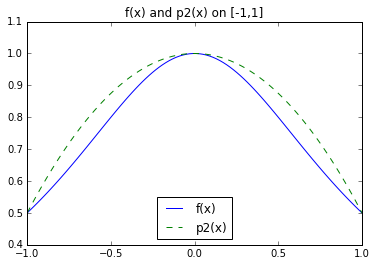

In [2]:
from __future__ import print_function
from __future__ import division
import numpy as np
import sympy as sp
from sympy import lambdify
import matplotlib.pyplot as plt
%matplotlib inline

#function f
f = lambda x: 1/(1+x**2)

def Lagrange(start, stop, n, function):
    '''Build Lagrange polynomial via numpy and sympy.
    description:
        returns a sympy polynomial that equals the
        value of "function" at the "n" evenly spaced 
        points on the interval set by "start"/"stop".
    input: 
        start = interval start
        stop = interval end
        n = number of points to build Langrange
            polynomial with.
        function = f(x) to interpolate
    output:
        (0) a degree n-1 polynomial equal to the
            dot product of (1) and (2)
        (1) an array [a1,a2,...an], where
            ai=f(xi)
        (2) an array [l1,l2,...,ln], where
            li(xj) = (Kronecker delta)ij
    '''
    x = sp.symbols('x')
    points = np.linspace(start,stop,n)
    Ls = [1] * n
    for i in range(n):
        #build the polynomial li(xj) = (Kronecker delta)ij
        for j in range(n):
            if i!=j:
                Ls[i] *= (x - points[j]) / (points[i] - points[j]) 
        #simplify the expression (for readability)
        Ls[i] = sp.expand(Ls[i])
    #create each ai, where ai is the value of f(xi)
    As = [function(points[i]) for i in range(n)]
    #sum the multiplications ai*li(x) to get p2(x)
    L = np.array(As).dot(Ls)
    return sp.simplify(L), As, Ls

print('i) The Lagrange form of the interpolating polynomial p2(x) is the inner product:', 
      Lagrange(-1,1,3,f)[1],Lagrange(-1,1,3,f)[2],', which is equal to', 
      Lagrange(-1,1,3,f)[0])

#graph f(x) and p2(x) using 100 evenly spaced points
#100 evenly spaced points on [-1,1]
Xs = np.linspace(-1,1,100)
#convert the Lagrange polynomial to a python function
x = sp.symbols('x')
p2 = lambdify(x, Lagrange(-1,1,3,f)[0])
#100 values of f(x) and p2(x)
Fs = np.array([f(x) for x in Xs])
P2s = np.array([p2(x) for x in Xs])
#plot
plt.plot(Xs,Fs, label = "f(x)")
plt.plot(Xs,P2s, label = "p2(x)", linestyle='--')
plt.ylim(.4,1.1)
plt.legend(loc='lower center')
plt.title('f(x) and p2(x) on [-1,1]')
plt.show()

In [3]:
print('ii) The L2 norm of the error using the 100 points plotted above is', 
      np.linalg.norm(Fs-P2s),'.')

ii) The L2 norm of the error using the 100 points plotted above is 0.560316389254 .


The error bound of a polynomial $p_n(x)$ interpolating a function $f(x)$ on $[-1,1]$ is
$$
\big|f(x)-p_n(x)\big| \leq \max_{-1 \leq \xi \leq 1} \Bigg| \frac{f^{(n+1)}(\xi)}{(n+1)!}\Bigg| \cdot \max_{-1 \leq x \leq 1} \Bigg| \prod_{i=0}^{n} (x-x_i) \Bigg|
$$

For our case where $n=2$ and $f(x) = 1/(1+x^2)$:
$$
\max_{-1 \leq \xi \leq 1} \Bigg| \frac{f^{(3)}(\xi)}{3!}\Bigg| = \frac{4.67}{6} = 0.778
$$
$$
\max_{-1 \leq x \leq 1} \Bigg| \prod_{i=0}^{n} (x-x_i) \Bigg| = 
\max_{-1 \leq x \leq 1} \big| (x+1)(x)(x-1) \big| = 
\max_{-1 \leq x \leq 1} \big| (x^3-x) \big| = 0.385
$$
Thus, 
$$
\big|f(x)-p_n(x)\big| \leq 0.3
$$

In [4]:
print('Given the above error bound at each point, the maximum L2 norm error for 100 points is',
     np.linalg.norm(np.array([0.3]*100)),'. The Lagrange interpolating polynomial p2(x) had',
     'an error of 0.56, which is approximately one fifth the size of the maximum possible',
     'error.')

Given the above error bound at each point, the maximum L2 norm error for 100 points is 3.0 . The Lagrange interpolating polynomial p2(x) had an error of 0.56, which is approximately one fifth the size of the maximum possible error.


iii) The interpolating polynomial $p_2(x)$ can be substituted for $f(x)$ in the following integral as an approximation:

$$
\int_{-1}^1 \frac{1}{1+x^2} dx \approx \int_{-1}^1 p_2(x)\ dx
$$

where

\begin{align}
 \int_{-1}^1 p_2(x)\ dx &= \sum_{i=0}^2f(x_i) \int_{-1}^1 l_i\ dx
 \\
 \\&= \sum_{i=0}^2a_i \int_{-1}^1 l_i\ dx
 \\
 \\&=0.5 \Big[\int_{-1}^1 0.5x^2 - 0.5x\ dx \Big]+ \Big[\int_{-1}^1 -x^2 + 1\ dx \Big] + 0.5  \Big[\int_{-1}^1 0.5x^2 + 0.5x\ dx \Big]
 \\
 \\&=0.5 \Big[\frac{1}{6}x^3 - 0.25x^2 \Big]_{-1}^1  + \Big[-\frac{1}{3}x^3 + x \Big]_{-1}^1  + 0.5  \Big[\frac{1}{6}x^3 + 0.25x^2 \Big]_{-1}^1 
 \\
 \\&=0.5 \Big[\frac{1}{3}\Big]  + \Big[\frac{4}{3}\Big]  + 0.5  \Big[\frac{1}{3}\Big]
 \\
 \\&= \frac{5}{3}
 \\
 \\&\approx 1.67
\end{align}

The substitution of $p_2(x)$ for $f(x)$ above revealed Simpson's quadrature rule, which is $\frac{1}{3}h(f_0+4f_1+f_2)$, where $h=\frac{1}{2}(x_2-x_0)=1$ on $[-1,1]$.

The exact solution to the integral of $f(x)$ is:

$$
\int_{-1}^1 \frac{1}{1+x^2} dx = \frac{\pi}{2} \approx 1.57
$$

The exact error of the integral approximation is $\approx 0.1$.

## b)

i) The matrix equation we wish to solve has the form:
$$
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \phi_2(x_0) & 1
\\ \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & 1
\\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & 1
\\ 1 & 1 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
c_0
\\ c_1
\\ c_2
\\ \beta
\end{bmatrix}
=
\begin{bmatrix}
f(x_0)
\\ f(x_1)
\\ f(x_2)
\\ 0
\end{bmatrix}
$$

The entries in the matrix are computed in the next cell.

In [5]:
phi = lambda x, xi: np.exp(-(x-xi)**2)

Xs_and_constant = [-1,0,1,1]

#explicitly compute the entries in the above matrix
matrix = np.eye(4,4)
for i in range(4):
    for j in range(4):
        if i==3 and j!=3:
            matrix[i,j] = 1
        elif i==3 and j==3:
            matrix[i,j] = 0
        elif j!=3:
            matrix[i,j] = phi(Xs_and_constant[i],Xs_and_constant[j])
        else:
            matrix[i,j] = 1
print("The entries in the above matrix are:\n", matrix)

The entries in the above matrix are:
 [[ 1.          0.36787944  0.01831564  1.        ]
 [ 0.36787944  1.          0.36787944  1.        ]
 [ 0.01831564  0.36787944  1.          1.        ]
 [ 1.          1.          1.          0.        ]]


The coefficients that solve the above system are:
 [-0.32324844  0.64649688 -0.32324844  0.59133603]


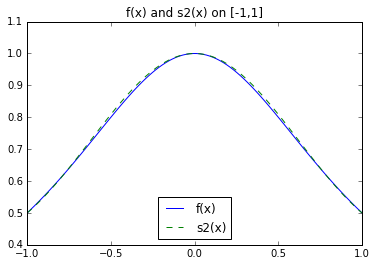

L2 norm of error at the 100 points is: 0.0535498068109


In [6]:
#solve the system
rhs = [f(-1),f(0),f(1),0]
coefficients = np.linalg.solve(matrix,rhs)
print("The coefficients that solve the above system are:\n", coefficients)

e = np.exp(1)
x = sp.symbols('x')
phi = 0
for i in range(4):
    if i!=3:
        phi += coefficients[i]*e**(-(x-(Xs_and_constant[i]))**2)
    else:
        phi += coefficients[i]
        
s2 = lambdify(x,phi)
S2s = [s2(x) for x in Xs]
        
#plot
plt.plot(Xs,Fs, label = "f(x)")
plt.plot(Xs,S2s, label = "s2(x)", linestyle='--')
plt.ylim(.4,1.1)
plt.legend(loc='lower center')
plt.title('f(x) and s2(x) on [-1,1]')
plt.show()

print("L2 norm of error at the 100 points is:", np.linalg.norm(Fs-S2s))

iii) It is not easy to use $s(x)$ to find an approximation to the integral of $f(x)$. $s(x)$ contains terms equal to the Gaussian function $e^{-x^2}$, which doesn't have an elementary indefinite integral. I think the integral of $s(x)$ would have to be solved for numerically, which is much more work than computing the integral of the polynomial interpolant.

## c)

The error using s(x) is less than one tenth of the error using p(x), 0.054 compared to 0.56. Visually, s(x) is clearly the better interpolant.

Obtaining s(x) is $\mathcal{O}(n^3)$, while obtaining p(x) is $\mathcal{O}(n^2)$, so the latter is less costly. A description of these costs is given below. Note that in the resources provided below, there is a parallel algorithm that gives a radial basis function interpolant with $\mathcal{O}(n)$ complexity.

Given $n$ interpolation points, the cost of obtaining s(x) is:

$\ \ \ \bullet$ Building matrix that is (n+1)x(n+1)

$\ \ \ \bullet$ Solving (n+1)x(n+1) symmetric system

where the majority of the cost is coming from the solution of the symmetric system. We can use a Cholesky decomposition to solve the symmetric system, which means obtaining s(x) has a cost with a leading complexity term of $\frac{1}{3}(n+1)^3$ operations.

The cost of obtaining p(x) is:

$\ \ \ \bullet$ Building Lagrange polynomials, which are of the form $p_{n-1}(x)=\sum\limits_{i=0}^n(\prod\limits_{0\leq j\leq n,i\neq j}^n \frac{x-x_j}{x_i-x_j})f(x_i)$.

For a given $i,j$ in the above formula, each term in the product has two additions/subtractions and one division. Then, the quotient is multiplied by the quotient from the next $j$. This means there are 4 operations per $j$. There are $n$ $j$'s per $i$, and $n+1$ $i$'s. So the leading complexity term of obtaining p(x) is $4n^2$ operations.

## Resources

Theoretical bound on polynomial error, examples and derivation: https://www.math.ust.hk/~mamu/courses/231/Slides/CH03_1B.pdf

Function maximization with Wolfram Alpha: http://www.wolframalpha.com/input/?i=max%28third+derivative+of+1%2F%281%2Bx**2%29%29+for+x+from+-1+to+1

Exact integral computation with Wolfram Alpha: http://www.wolframalpha.com/input/?i=1%2F%281%2Bx^2%29+integrate+from+-1+to+1

Gaussian function/integral: https://en.wikipedia.org/wiki/Gaussian_integral

Radial basis function interpolation, low complexity: http://www.bu.edu/tech/support/research/visualization/gallery/petrbf/